# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [1]:
# Importa las librerias <3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/main/"
#Complementos con la dirección especifica de la base de datos que queremos.
MEDICAMENTOS = "Capitulo_3/drug200.csv"

def extraer_datos(root,database):
    csv_path = root + database
    return pd.read_csv(csv_path)

In [3]:
# Visualiza el DataFrame
df = extraer_datos(DOWNLOAD_ROOT,MEDICAMENTOS)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <span style="color:green">2. Análisis de cada Variable</span>

Max Age: 74
Min Age: 15


<Figure size 648x360 with 0 Axes>

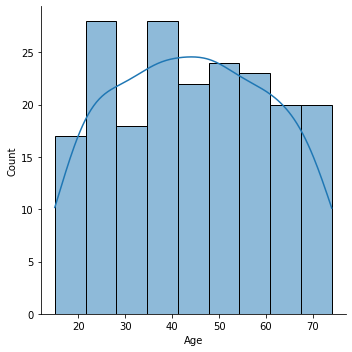

In [5]:
#Importa seaborn para tener gráficos más chidos 
import seaborn as sns
# Analiza la edad, visualiza sus máximos y mínimos
print("Max Age:", df.Age.max())
print("Min Age:", df.Age.min())
#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen
plt.figure(figsize = (9,5))
#Crea un displot para de la edad (por ser una variable numérica)
sns.displot(df.Age,kde=True)

In [6]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

M    104
F     96
Name: Sex, dtype: int64

<AxesSubplot:xlabel='BP', ylabel='Count'>

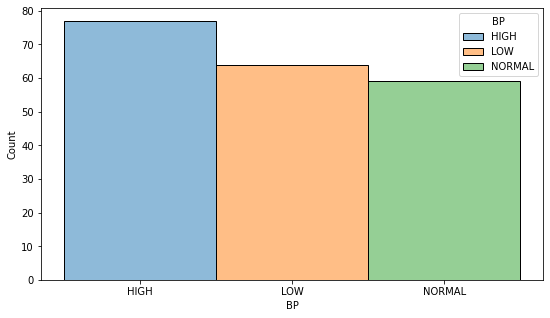

In [7]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="BP",hue="BP")

<AxesSubplot:xlabel='Cholesterol', ylabel='Count'>

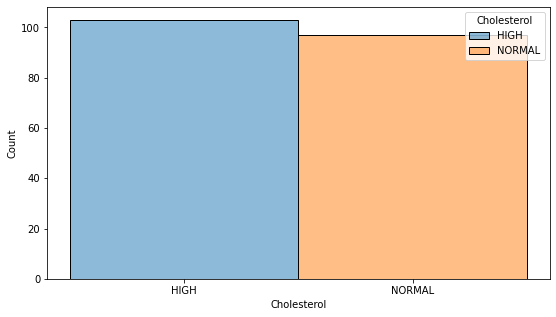

In [8]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Cholesterol",hue="Cholesterol")

<Figure size 648x360 with 0 Axes>

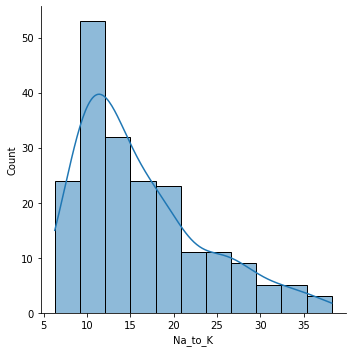

In [9]:
# Crea un displot para Sodio Potasio
plt.figure(figsize = (9,5))
sns.displot(df.Na_to_K,kde=True)

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

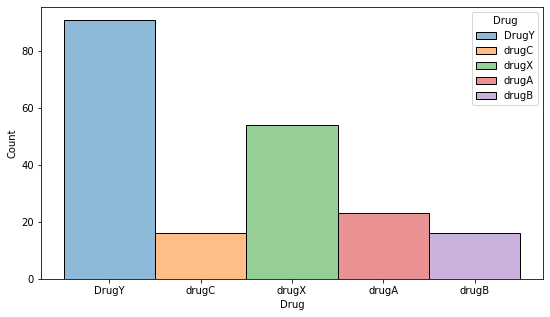

In [10]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊
plt.figure(figsize = (9,5))
sns.histplot(data=df,x="Drug",hue="Drug")
#Cuenta los medicamentos
df.Drug.value_counts()

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


Text(0.5, 1.0, 'Edad/Medicamento')

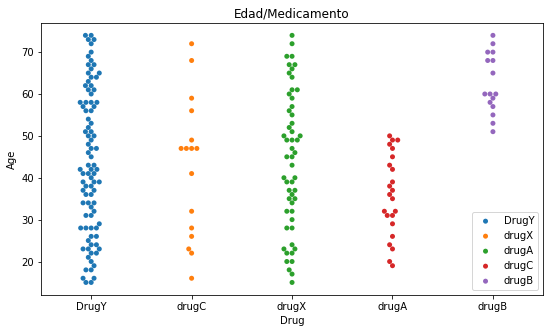

In [11]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Age",data = df)
plt.legend(df.Drug.value_counts().index)
plt.title("Edad/Medicamento")

Text(0.5, 1.0, 'Género/Medicamento')

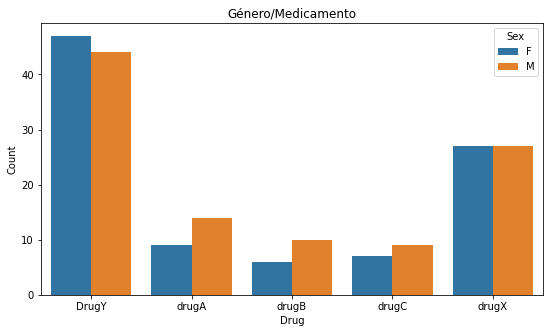

In [12]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)
plt.title("Género/Medicamento")

Text(0.5, 1.0, 'Presión Sanguinea/Medicamentos')

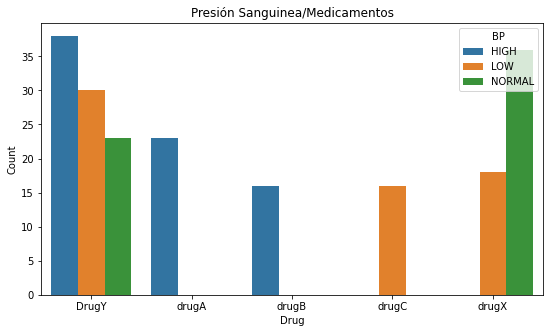

In [13]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)
plt.title("Presión Sanguinea/Medicamentos")

Text(0.5, 1.0, 'Colesterol/Medicamentos')

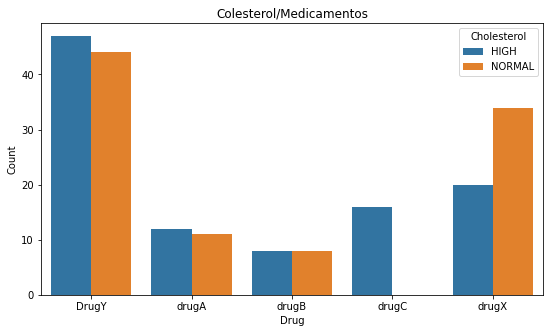

In [14]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))
sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)
plt.title("Colesterol/Medicamentos")

Text(0.5, 1.0, 'Sodio-Potasio/Medicamentos')

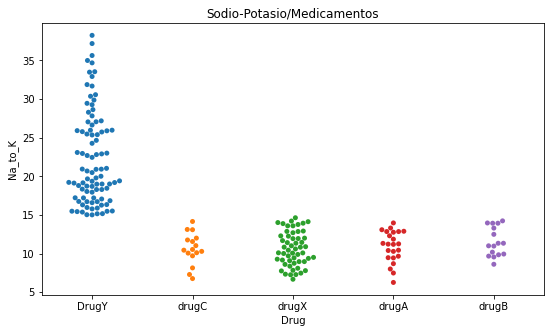

In [15]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize = (9,5))
sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)
plt.title("Sodio-Potasio/Medicamentos")

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [17]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder

def label_encoder(datos_categoria):
    le = LabelEncoder()
    df[datos_categoria] = le.fit_transform(df[datos_categoria])

variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in variables:
    label_encoder(l)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,0
2,47,1,1,0,43,3,0
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1


In [18]:
# Crear set de entrenamiento y set de prueba
x = df.drop(["Drug"],axis=1)
y = df.Drug
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [19]:
## Crear modelo para medicamento
y_train_y = (y_train == 0)
y_test_y = (y_test == 0)

Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [20]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(x_train,y_train_y)
#sgd.predict([[47,1,1,0,8,0]])

SGDClassifier(random_state=42)

In [ ]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 
sgd.predict([x_train.loc[0]]), y_train_y.loc[42]

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [21]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd,x_train,y_train_y,cv=3,scoring="accuracy")

array([0.83333333, 0.77358491, 0.71698113])

 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [22]:
# Modelo que nunca es Y
from sklearn.base import BaseEstimator
class NuncaC(BaseEstimator):
    def fit(self,X,y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

nunca_c = NuncaC()
cross_val_score(nunca_c,x_train,y_train_y,cv=3,scoring="accuracy")


array([0.57407407, 0.52830189, 0.47169811])

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [23]:
# Matriz de confusión
#Importar cross_val_predict 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd,x_train,y_train_y,cv=3)
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_y,y_train_pred)

array([[56, 28],
       [ 8, 68]], dtype=int64)

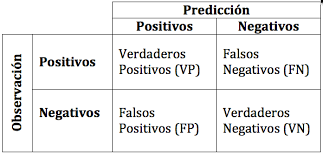

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [24]:
#Importar precision_score y recall_score 
from sklearn.metrics import precision_score, recall_score
p = precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r

0.7906976744186046

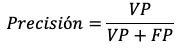

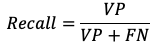

In [25]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train_y)
#Hacer la matriz de confusión otra vez
y_train_pred = cross_val_predict(rfc,x_train,y_train_y,cv=3)
confusion_matrix(y_train_y,y_train_pred)

array([[84,  0],
       [ 0, 76]], dtype=int64)

In [26]:
#Calcular la precisión y recall con el nuevo clasificador 
p = precision_score(y_train_y,y_train_pred)
r = recall_score(y_train_y,y_train_pred)
p,r

(1.0, 1.0)

In [27]:
#Calcular F1
from sklearn.metrics import f1_score
f1_score(y_train_y,y_train_pred)

1.0

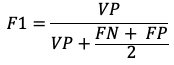

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [28]:
#Puntación de un paciente aleatorio
y_score = sgd.decision_function([[47,1,1,0,8,0,0]])
y_score

'y_score = sgd.decision_function([[47,1,1,0,8,0,0]])\ny_score'

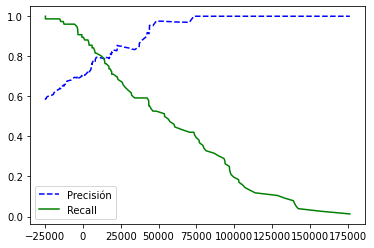

In [31]:
#Graficar la precisión y recall 
y_scores = cross_val_predict(sgd,x_train,y_train_y,cv=3,method="decision_function")
#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si
from sklearn.metrics import precision_recall_curve
precisions, recalls, umbrales = precision_recall_curve(y_train_y,y_scores)
plt.plot(umbrales, precisions[:-1],"b--",label="Precisión")
plt.plot(umbrales, recalls[:-1],"g-",label="Recall")
plt.legend()
plt.show()

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [33]:
#Supon que ya lo pensaste y querías un umbral  90 
umbral_90 = umbrales[np.argmax(precisions >= 0.90)]
umbral_90

42147.7219027211

In [34]:
#Arroja la precisión y recall para un umbral de 90
y_train_90 = (y_scores >= umbral_90)
p = precision_score(y_train_y,y_train_90)
r = recall_score(y_train_y,y_train_90)
p,r

(0.9, 0.5921052631578947)

***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [35]:
#Importar roc_curve
from sklearn.metrics import roc_curve
fpr, tpr, umbrales = roc_curve(y_train_y,y_scores)

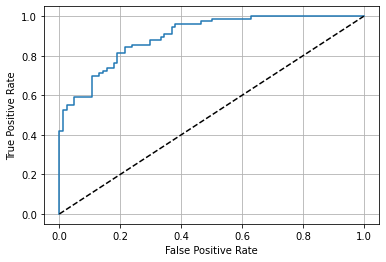

In [36]:
#Graficar la curva ROC
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1],[0, 1], 'k--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#Poner una cuadrícula
plt.grid()
plt.show()

Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [37]:
#Calcular el puntaje de la curva
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_y,y_scores)

0.8984962406015037

In [38]:
#Compararlo con el modelo de random forest
y_forest = cross_val_predict(rfc,x_train,y_train_y,cv=3,method="predict_proba")
y_scores_forest = y_forest[:,1]

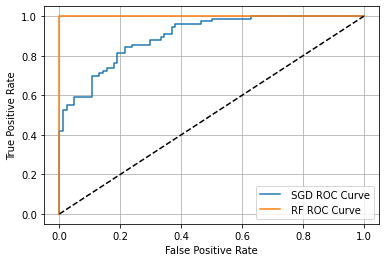

In [39]:
#Graficar la curva ROC y la predicción de random forest 
fpr_forest, tpr_forest, umbral_forest = roc_curve(y_train_y,y_scores_forest)
plt.plot(fpr, tpr, label=" SGD ROC Curve")
plt.plot(fpr_forest, tpr_forest, label=" RF ROC Curve")
plt.plot([0, 1],[0, 1], 'k--')
plt.legend()
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.grid()
plt.show()

In [40]:
#Calcular el puntaje (área bajo la curva) de random forest  
roc_auc_score(y_train_y,y_scores_forest)

1.0

## <span style="color:green">7. Clasificadores Multiclase</span>


In [41]:
# Importar SVC=Support Vector Classifier
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)

#Predecir a un humano aleatorio para ver que todo este funcionando bien 
svm.predict([[25,0,1,0,167,1]])

SVC()

In [42]:
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.decision_function([[25,0,1,0,167,1,0]])
#Decidirá por el qué tenga mayor puntaje

'some_scores = svm.decision_function([[25,0,1,0,167,1,0]])\nsome_scores\nnp.argmax(some_scores)'

In [43]:
#Ahora, utiliza el clasificador multiclase 
from sklearn.multiclass import OneVsRestClassifier
svm = OneVsRestClassifier(SVC())
svm.fit(x_train,y_train)
#Predecir a un humano ahora con este clasificador
svm.predict([[25,0,1,0,167,1]])

OneVsRestClassifier(estimator=SVC())

In [44]:
#Utilizar decision_function para observar los puntajes de cada medicina 
svm.decision_function([[25,0,1,0,167,1,0]])

In [ ]:
#campararlo con los datos obtenidos de sgd.fit 
sgd.fit(x_train,y_train)

## <span style="color:green">8. Analizar Errores</span>

In [ ]:
#Hacer un clasificador de random forest
rfc.fit(x_train, y_train)

In [45]:
#Utilizar la matriz de confusión 
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)
conf_mz = confusion_matrix(y_train,y_train_pred)
conf_mz

array([[76,  0,  0,  0,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  9,  2],
       [ 0,  0,  0,  0, 43]], dtype=int64)

In [ ]:
#utilizar ahora SGD
y_train_pred = cross_val_predict(sgd, x_train, y_train, cv=3)
conf_mz = confusion_matrix(y_train,y_train_pred)
conf_mz